In [29]:
# import data set iris
from sklearn import datasets
import numpy as np
import pandas as pd
iris = datasets.load_iris()
list(iris.keys())


['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [7]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [39]:
X=iris["data"][:,3:]

In [42]:
y=(iris["target"] == 2).astype(int) 
# 1 if iris virginicia else 0

In [44]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs',random_state=42)
log_reg.fit(X,y)

LogisticRegression(random_state=42)

In [55]:
X_new=np.linspace(0,3,1000).reshape(-1,1)

In [75]:
y_proba=log_reg.predict_proba(X_new)
print(y_proba[:])

[[9.99250016e-01 7.49984089e-04]
 [9.99240201e-01 7.59799387e-04]
 [9.99230257e-01 7.69743043e-04]
 ...
 [3.08374822e-03 9.96916252e-01]
 [3.04400296e-03 9.96955997e-01]
 [3.00476842e-03 9.96995232e-01]]


kolom 0 untuk data yang tidak virinica

kolom 1 untuk data yang virginica 

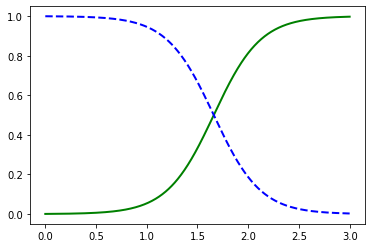

In [76]:
import matplotlib.pyplot as plt
plt.plot(X_new, y_proba[:,1], 'g-', linewidth=2, label ='Iris Virginica')
plt.plot(X_new,y_proba[:,0],'b--',linewidth=2,label='Not iris virginica')
plt.show()

In [91]:
y[y==0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

d:\Materi_data-science\Code\Excercise Train_data\env\lib\site-packages\matplotlib\patches.py:1450: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.verts = np.dot(coords, M) + [


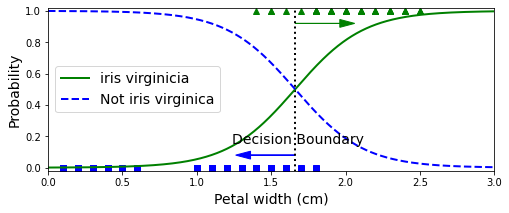

In [92]:
decision_boundary= X_new[y_proba[:,1] >= 0.5][0]
plt.figure(figsize=(8,3))
plt.plot(X[y==0],y[y==0],'bs')#non virginicia
plt.plot(X[y==1],y[y==1],'g^')# virginicia
plt.plot([decision_boundary, decision_boundary], [-1, 2], 'k:', linewidth=2)
plt.plot(X_new, y_proba[:, 1],'g-',linewidth=2, label ='iris virginicia')
plt.plot(X_new, y_proba[:,0],'b--',linewidth=2, label = 'Not iris virginica')
plt.text(decision_boundary + 0.02,0.15,'Decision Boundary',fontsize=14,color='k',ha='center')
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [93]:
decision_boundary

array([1.66066066])

In [99]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

jika length petal 1.7 maka ia adalah virginica tapi jika 1.5 dia bukan virginica 

In [101]:
log_reg.decision_function([[1.7],[1.5]])

array([ 0.17153551, -0.69508141])

beta >=0.5 => 1, t >= 0

beta <=0.5 => 0, t < 0

[ 0.17153551, -0.69508141]

[ 1, 0 ]

Diliat pada decision boundary memiliki hasil 1.6 maka dapat dinyatakan bahwa jika 
- hasil dari petal width >= decision boundary => virginicia flower
- Hasil dari petal width < decision boundary  => otherwise flower



